In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

Random number generators
===

1. Multiplicative linear congruential generator (MLCG)
---

MLCG uses the following recurrence for generating new values:

$$
s_{i+1} = (a_1 s_i + a_0)\mod m
$$

In [24]:
def mlcg(x, a0=0, a1=20, m=53):
    while True:
        x = (a1 * x + a0) % m
        yield x


def random_sample_mlcg(n, a0=0, a1=20, m=53, seed=21):
    rnd = mlcg(seed, a0, a1, m) 
    sample = [next(rnd) for i in range(n)]
    
    return np.array(sample)

In [25]:
u = random_sample_mlcg(200)

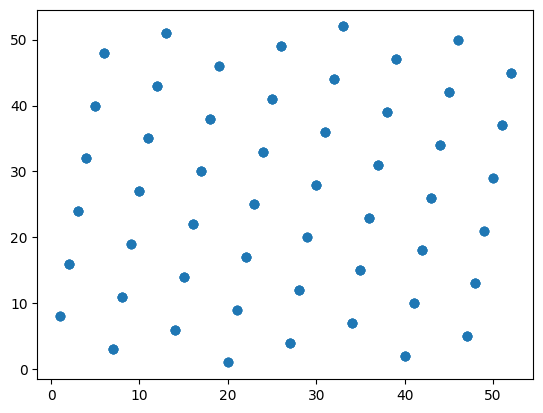

In [26]:
plt.scatter(u[1:], u[:-1])

In [36]:
n = 20000
u = random_sample_mlcg(n, a0=0, a1=65539, m=2**31, seed=10)
z = (u - 0.5) / (2**31-1)

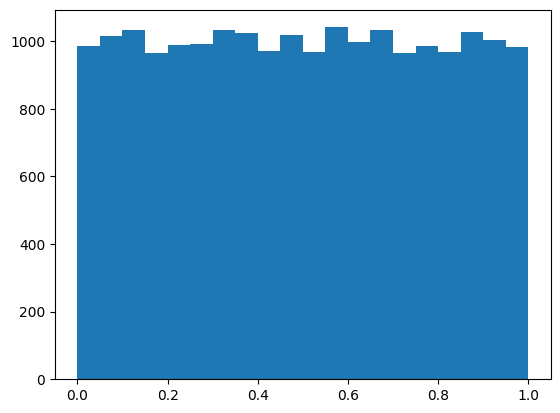

In [37]:
_ = plt.hist(z, bins=20)

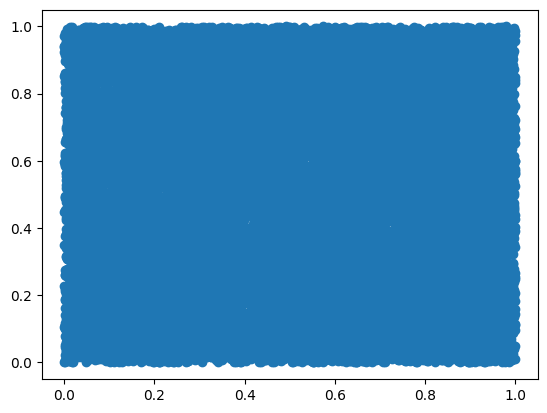

In [38]:
z1 = z[:-2]
z2 = z[1:-1]
z3 = z[2:]

plt.scatter(z1, z2)

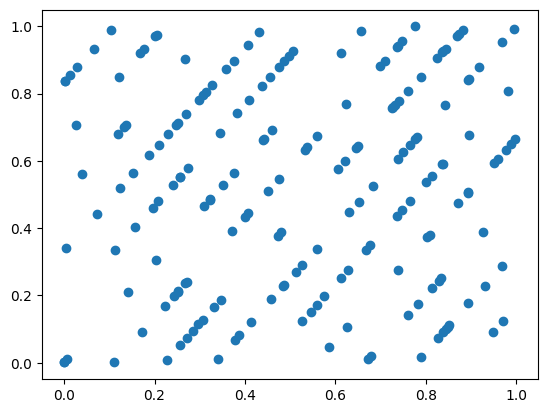

In [39]:
i = np.argwhere(z3 < 0.01)
plt.scatter(z1[i], z2[i])

2. Uniformly distributed random numbers
---

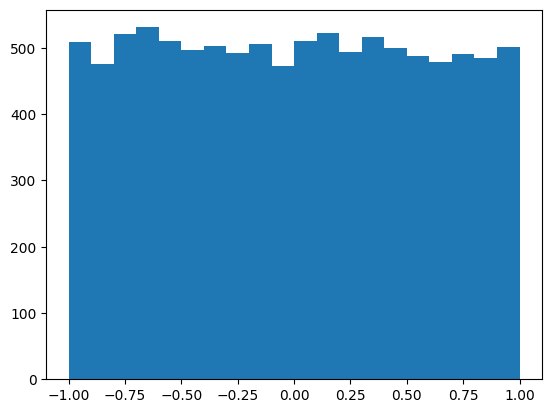

In [42]:
s = np.random.default_rng(seed=42).uniform(-1, 1, 10000)
_ = plt.hist(s, 20)

3. Non-uniformly distributed random numbers
---

The "Rejection method" - exercise

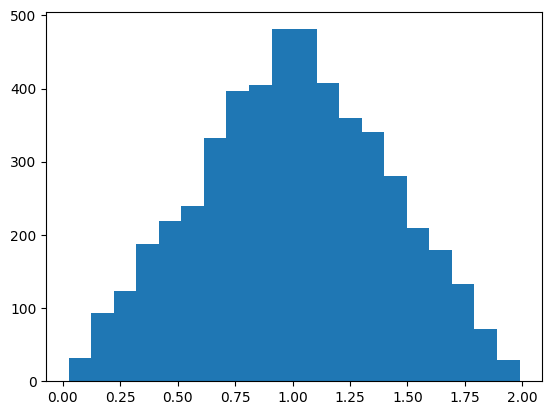

In [45]:
def reject(fx, a, b, k):
    while True:
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, k)
        if y < fx(x):
            return x

def fx(x: np.float64) -> np.float64:
    if x <= 0 or x >= 2:
        return 0
    if x < 1:
        return x
    return 2 - x

n = 5000
s = [reject(fx, 0, 2, 1) for k in range(n)]

_ = plt.hist(s, 20)    

Box-Muller method for generating pairs of normal r.v.

In [46]:
def box_muller():
    while True:
        u1 = np.random.uniform(-1, 1)
        u2 = np.random.uniform(-1, 1)
        s = u1**2 + u2**2
        if s < 1 and s != 0:
            break
    w = np.sqrt(-4.0*np.log(s)) / s
    return u1*w, u2*w

In [47]:
a, b = box_muller()

In [48]:
a

2.007325122819062

In [49]:
b

3.5266293711366083

Monte-Carlo methods
===

In [60]:
def pdf1(n):
# Generate n i.i.d. random variates from
#
# f(x) = 0.2 N1(x) + 0.3 N2(x) + 0.5 N3(x)
#
# N1: normal(0   , 0.50)
# N2: normal(6.5 , 0.25)
# N3: normal(14.5, 0.75)
#

# version 1: not the most memory-efficient!

  # step 1. generate the indexes (0,1,2) of the 
  #    mixture components, with probabilities
  #    0.2, 0.3 and 0.5, respectively:
  idx = np.ones((n,), dtype=np.int64)
  u   = np.random.uniform(0, 1, n) 
  idx[u < 0.2] = 0
  idx[u >= 0.5] = 2

  # step 2. generate samples from the 3 normal populations
  mxt = np.concatenate((
      np.random.normal(0, 0.5, n),
      np.random.normal(6.5, 1.25, n),
      np.random.normal(14.5, 0.75, n)
  ))
    
  # step 3. select the component of the mixture according
  #    to priors in idx
  i = idx + 3*np.arange(n)
  x = mxt[i]

  return x

In [66]:
s = pdf1(10000)

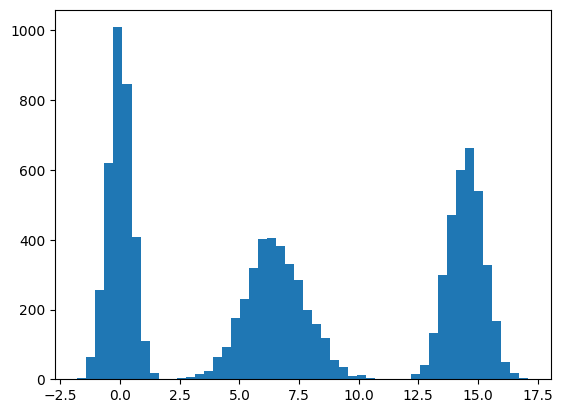

In [73]:
_ = plt.hist(s, 50)

Bootstrapping
===

Aspirin example:

95% Confidence interval for theta:  [0.92282602 1.59732433]


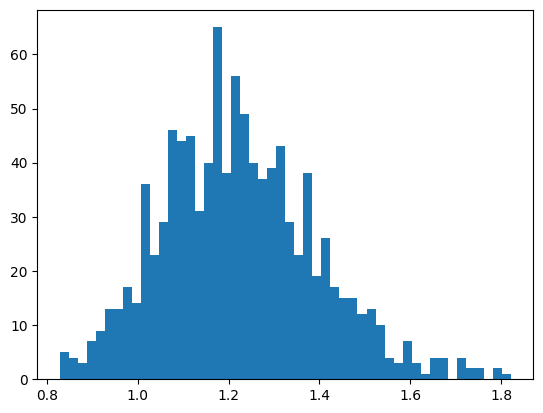

In [82]:
n1 = 11037
n1_cases = 119
n2 = 11034
n2_cases = 98

s1 = np.ones((n1, ), dtype=np.int64); s1[n1_cases:] = 0
s2 = np.ones((n2, ), dtype=np.int64); s2[n2_cases:] = 0

B = 1000  # no. of bootstraps
p = n2 / n1
theta = np.zeros((B,), dtype=np.float64)

for i in np.arange(B):
  theta[i] = p * np.sum( np.random.choice(s1, n1, replace=True) ) / np.sum( np.random.choice(s2, n2, replace=True) )

_ = plt.hist(theta, 50)
print("95% Confidence interval for theta: ",
  np.quantile(theta, q=(0.025, 0.975)))

Rainfall estimates: data example (yearly average precipitations):

In [77]:
rf = np.array([80,40,65,46,68,32,58,60,61,60,45,48,63,44,66,39,35,44,104,36,45,69,
               50,72,57,53,30,40,56,55,46,46,72,50,68,71,37,64,46,69,31,33,61,56,55,
               40,37,40,34,60,54,52,20,49,43,62,44,33,45,30,53,32,38,56,63,52,79,30,
               62,75,70,60,34,54,51,35,53,44,53,73,80,54,52,
               40,77,52,75,42,43,39,54,70,40,73,41,75,43,80,60,59,41,67,83,56,29,21], dtype=np.float64)